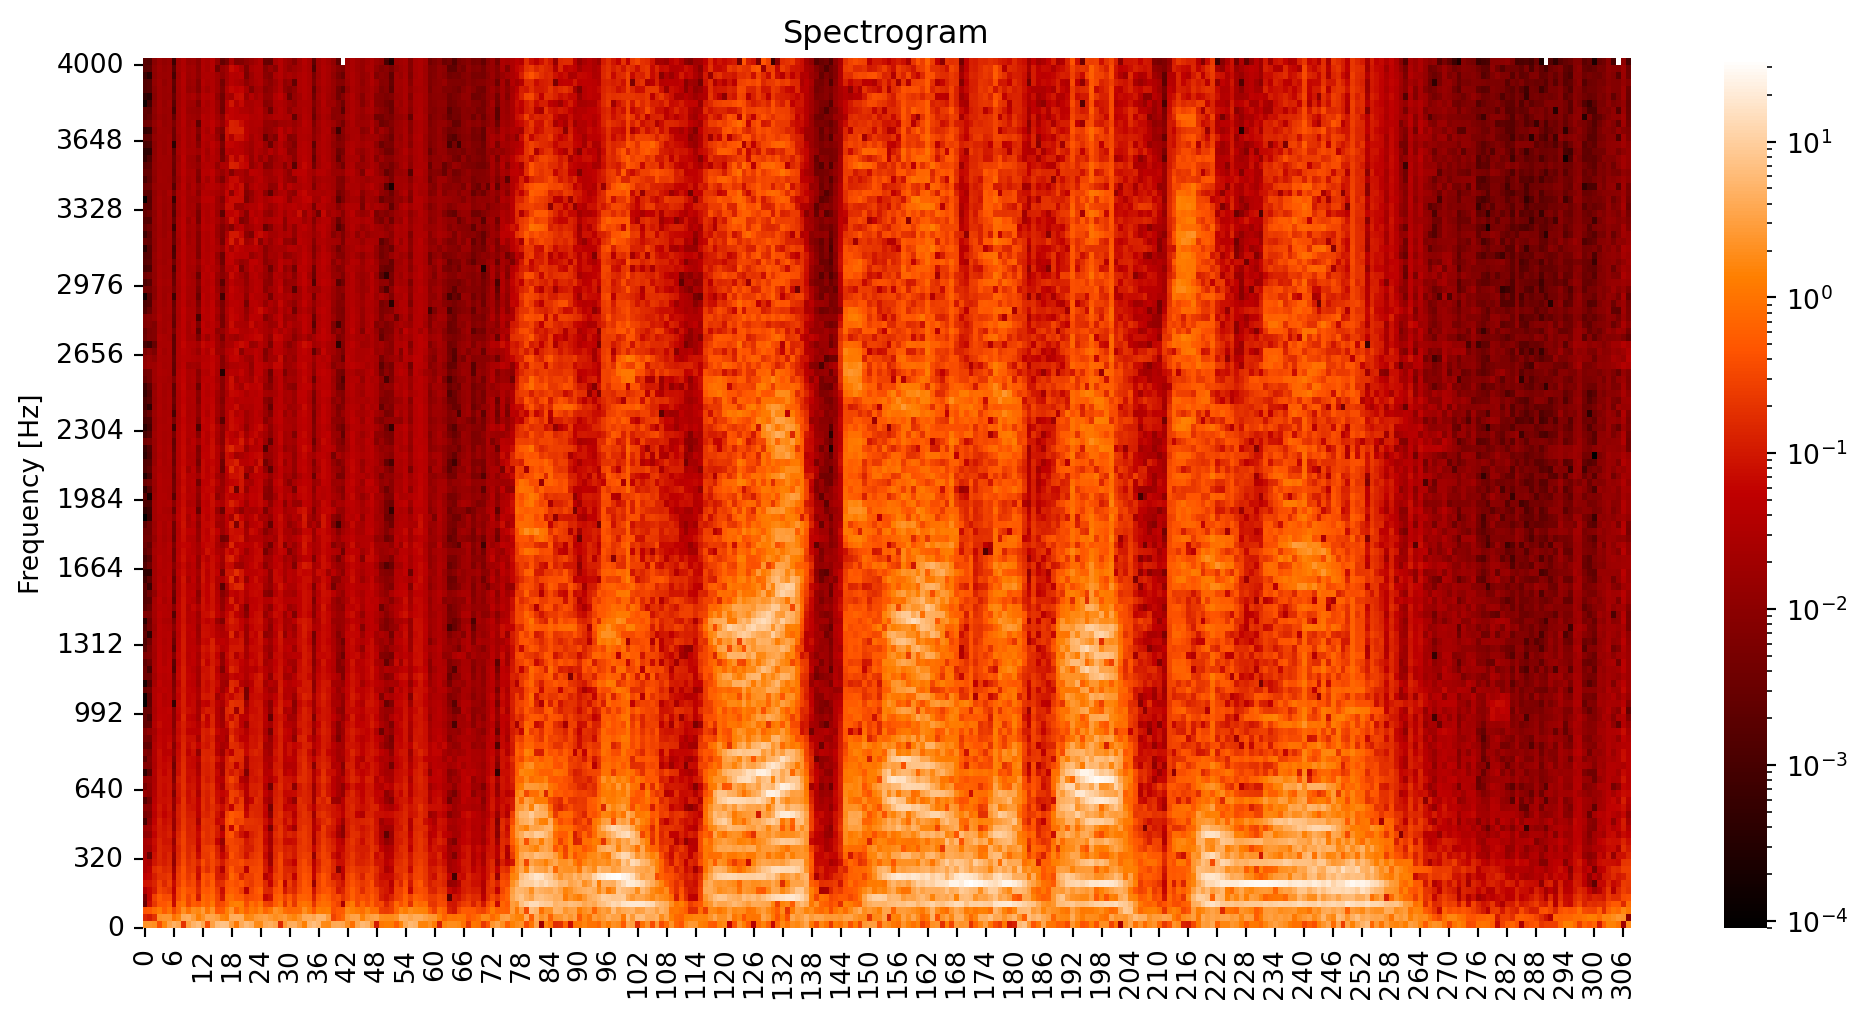

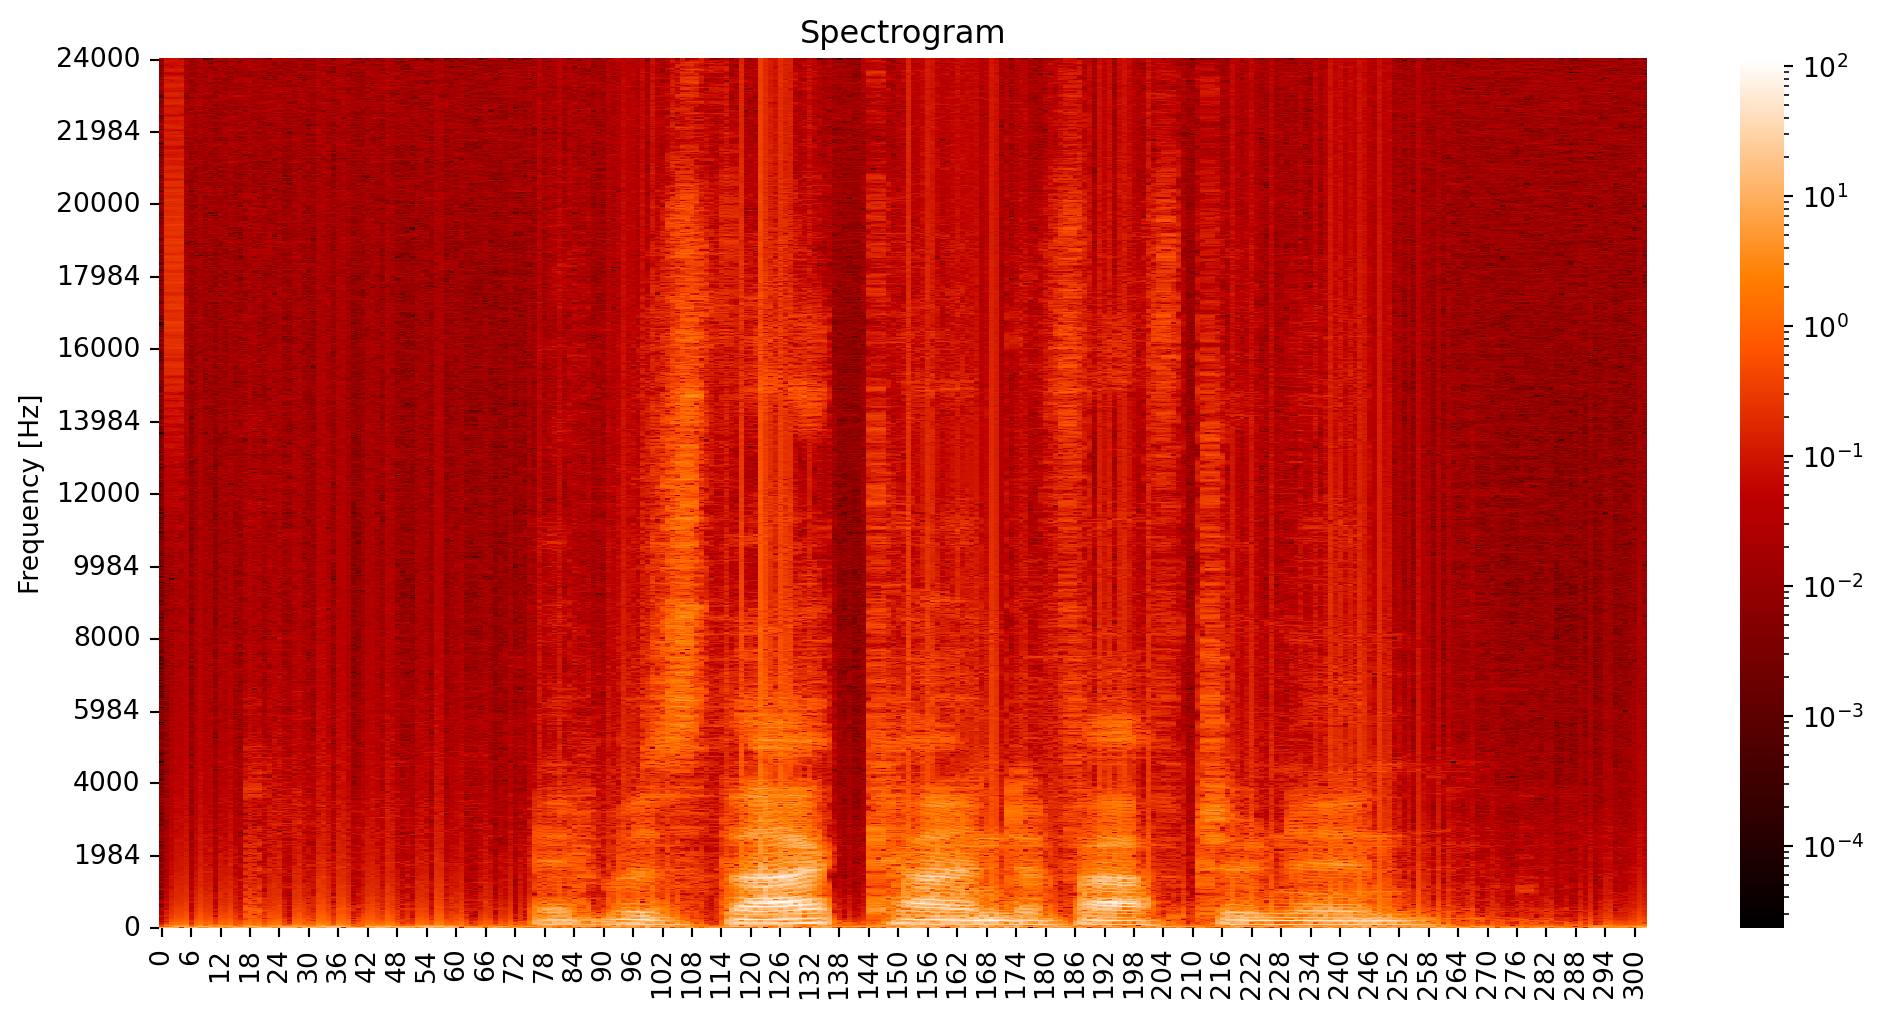

In [8]:
from importlib import reload
import main
import audio_utils
import baseline
import dataset
import model
import transforms
import data_module
import train

reload(audio_utils)
reload(baseline)
reload(dataset)
reload(model)
reload(transforms)
reload(data_module)

reload(train)
reload(main)

main.main()